# Лабораторная работа №8 по машинному обучению

## Выполнил Колесников А.А., БМТ1-12М

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия 

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

### 1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Линейная регрессия

In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

#### Линейная модель с Ridge регуляризацией (L2)

In [6]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

#### Линейная модель с Lasso регуляризацией (L1)

In [7]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

#### Полиномиальная регрессия

In [32]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [35]:
# Вывод метрик
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name}:")
    print(f"R2: {r2_score(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print()

print_metrics(y_test, y_pred_linear, "Linear Regression")
print_metrics(y_test, y_pred_ridge, "Ridge Regression")
print_metrics(y_test, y_pred_lasso, "Lasso Regression")
print_metrics(y_test, y_pred_poly, "Polynomial Regression")

Linear Regression:
R2: 0.4526
MSE: 2900.1936
MAE: 42.7941

Ridge Regression:
R2: 0.4192
MSE: 3077.4159
MAE: 46.1389

Lasso Regression:
R2: 0.3576
MSE: 3403.5757
MAE: 49.7303

Polynomial Regression:
R2: 0.4156
MSE: 3096.0283
MAE: 43.5817



При использовании Ridge и Lasso регрессии на немасштабированных данных, результаты хуже, чем у обычной линейной регрессии. Это связано с тем, что регуляризация штрафует большие значения коэффициентов, а при немасштабированных данных признаки имеют разный масштаб, что приводит к некорректной работе моделей. Поэтому промасштабируем признаки с помощью StandardScaler:

In [36]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge регрессия на масштабированных данных
ridge_model_scaled = Ridge()
ridge_model_scaled.fit(X_train_scaled, y_train)
y_pred_ridge_scaled = ridge_model_scaled.predict(X_test_scaled)

# Lasso регрессия на масштабированных данных
lasso_model_scaled = Lasso()
lasso_model_scaled.fit(X_train_scaled, y_train)
y_pred_lasso_scaled = lasso_model_scaled.predict(X_test_scaled)

# Вывод метрик
print_metrics(y_test, y_pred_linear, "Linear Regression")
print_metrics(y_test, y_pred_ridge_scaled, "Ridge Regression (Scaled)")
print_metrics(y_test, y_pred_lasso_scaled, "Lasso Regression (Scaled)")
print_metrics(y_test, y_pred_poly, "Polynomial Regression")

Linear Regression:
R2: 0.4526
MSE: 2900.1936
MAE: 42.7941

Ridge Regression (Scaled):
R2: 0.4541
MSE: 2892.0146
MAE: 42.8120

Lasso Regression (Scaled):
R2: 0.4669
MSE: 2824.5681
MAE: 42.8030

Polynomial Regression:
R2: 0.4156
MSE: 3096.0283
MAE: 43.5817



Lasso регрессия стала лучшей моделью после масштабирования данных. Она не только улучшила качество предсказаний (наибольший R2 и наименьший MSE), но и отобрала наиболее важные признаки, уменьшив мультиколлинеарность.

Ridge регрессия также показала незначительное улучшение по сравнению с линейной регрессией. Это говорит о том, что регуляризация помогает модели лучше обобщать данные.

Линейная регрессия остается надежной базовой моделью. Она не требует масштабирования данных и показывает достойные результаты.

Полиномиальная регрессия показала худшие результаты. Изменение показателя degree на другие (>2) только ухудшало качество модели.

#### Построим графики

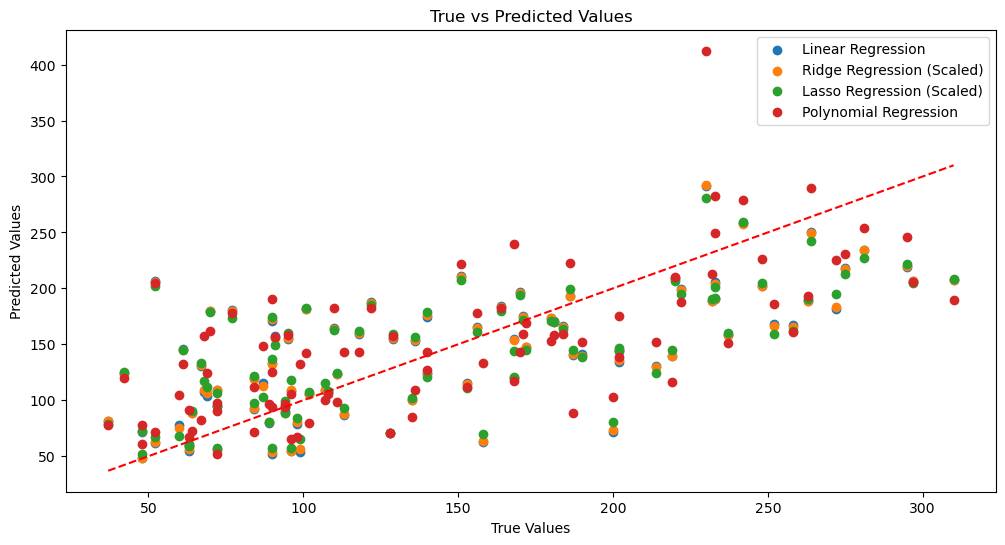

In [37]:
# Построение scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, label="Linear Regression")
plt.scatter(y_test, y_pred_ridge_scaled, label="Ridge Regression (Scaled)")
plt.scatter(y_test, y_pred_lasso_scaled, label="Lasso Regression (Scaled)")
plt.scatter(y_test, y_pred_poly, label="Polynomial Regression")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

#### Изобразим для каждой модели по отдельности

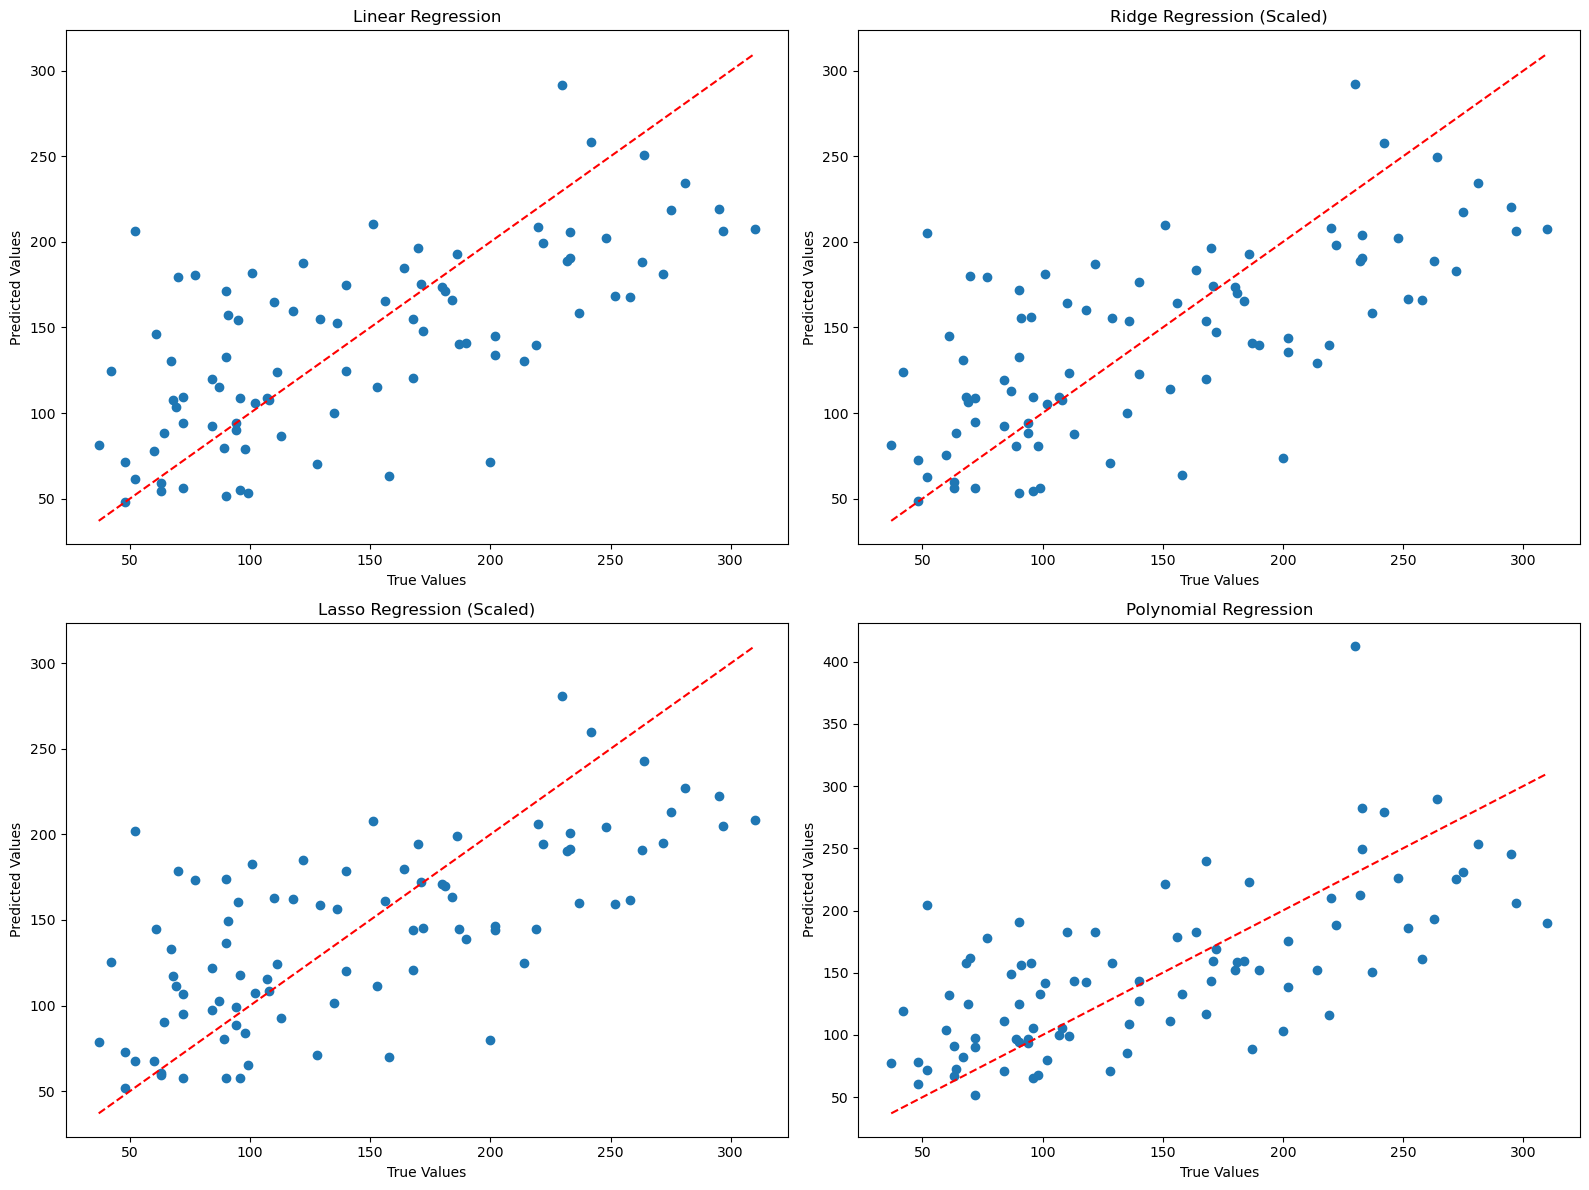

In [39]:
# Построение scatterplot для каждой модели
plt.figure(figsize=(16, 12))

# Линейная регрессия
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")

# Ridge регрессия
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_ridge_scaled)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression (Scaled)")

# Lasso регрессия
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lasso_scaled)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression (Scaled)")

# Полиномиальная регрессия
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_poly)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression")

plt.tight_layout()
plt.show()

### 2. Классификация. Найти оптимальное значение параметра регуляризации  𝐶 с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

In [41]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [43]:
C_values = np.logspace(-4, 4, 20)
C_values

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [55]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

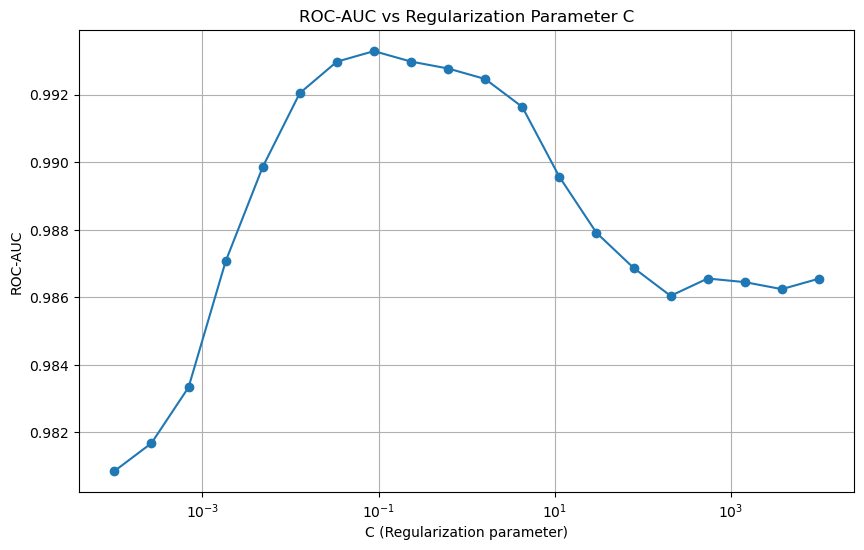

Оптимальное значение C: 0.08858667904100823


In [60]:
cv = StratifiedKFold(n_splits=5)
logistic_model = LogisticRegressionCV(Cs=C_values, cv=cv, scoring='roc_auc', max_iter=10000)
logistic_model.fit(X_train, y_train)

# Построение графика зависимости ROC-AUC от параметра C
mean_scores = np.mean(logistic_model.scores_[1], axis=0)

plt.figure(figsize=(10, 6))
plt.semilogx(C_values, mean_scores, marker='o')
plt.xlabel("C (Regularization parameter)")
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC vs Regularization Parameter C")
plt.grid(True)
plt.show()

# Оптимальное значение C
optimal_C = logistic_model.C_[0]
print(f"Оптимальное значение C: {optimal_C}")

На графике видно, что при малых значениях C (сильная регуляризация) ROC-AUC низкий, так как модель слишком проста и недообучается.

При увеличении C ROC-AUC растет, достигает максимума, а затем стабилизируется или снижается (риск переобучения).

Оптимальное значение C соответствует точке максимума ROC-AUC. Оптимальное значение C = 0.089

### 3. Выбрать порог классификации для LogisticRegression на основе метрики

По умолчанию логистическая регрессия использует порог 0.5 для разделения классов, но этот порог может быть неоптимальным для конкретной задачи. Выбирем порог на основе метрики F1-score, которая учитывает как точность (precision), так и полноту (recall).

In [77]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [78]:
# Обучение логистической регрессии с оптимальным C из пункта 2
logistic_model_optimal = LogisticRegression(C=optimal_C, max_iter=10000)
logistic_model_optimal.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, max_iter=10000)

На трейне определим оптимальный порог и проверим его на тесте

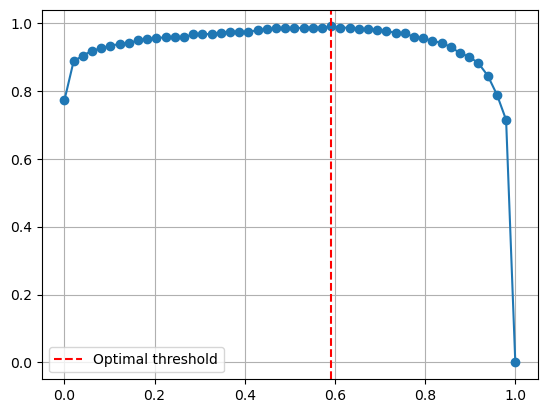

При оптимальном пороге классификации: 0.5918 достигается f1_score = 0.9895


In [82]:
thresholds = np.linspace(0, 1, 50)

# Предсказание вероятностей на тренировочных данных
y_pred_proba_train = logistic_model_optimal.predict_proba(X_train)[:, 1]  # Вероятности класса 1

f1_scores = [f1_score(y_train, y_pred_proba_train >= threshold) for threshold in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label='Optimal threshold')
plt.legend()
plt.grid()
plt.show()
print(f'При оптимальном пороге классификации: {optimal_threshold:.4f} достигается f1_score = {max(f1_scores):.4f}')

In [83]:
# Предсказание вероятностей на тестовых данных
y_pred_proba_test = logistic_model_optimal.predict_proba(X_test)[:, 1]  # Вероятности класса 1

# Классификация с оптимальным порогом (найденным на тренировочных данных)
y_pred_test = (y_pred_proba_test >= optimal_threshold).astype(int)

# Оценка качества модели на тестовых данных
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

# Вывод результатов
print(f'На тестовых данных с порогом {optimal_threshold:.4f}:')
print(f'F1-score: {f1_test:.4f}')
print(f'Precision: {precision_test:.4f}')
print(f'Recall: {recall_test:.4f}')

На тестовых данных с порогом 0.5918:
F1-score: 0.9787
Precision: 0.9857
Recall: 0.9718


На тренировочных данных оптимальный порог классификации составил 0.5918.
При этом пороге достигается высокий F1-score = 0.9895, что указывает на практически идеальное качество модели на тренировочных данных.

Применение того же порога (0.5918) к тестовым данным дало следующие результаты:
F1-score: 0.9787
Precision: 0.9857
Recall: 0.9718
Эти метрики также очень высокие, что говорит о том, что модель хорошо обобщает и не переобучилась.